<a href="https://colab.research.google.com/github/marcos-code/sigmoidal_datascience/blob/main/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de default.

Default é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.


<p align=center>
  <img src="https://image.freepik.com/free-vector/debt-bankruptcy-symbol_98292-4514.jpg" height="300px">
</p>

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de Machine Learning para previnir a inadimplência de alguns clientes.

O conjunto de dados a ser utilizado neste Projeto de Data Science parte de uma competição realizada por uma startup a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.


## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [36]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q


# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# definir o estilo do seaborn para os plots
sns.set_style

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [37]:
# importando os dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")




# Dicionário
* ids                                                  
* target_default                                       
* score_1                                              
* score_2                                              
* score_3                                             
* score_4                                             
* score_5                                             
* score_6                                             
* risk_rate                                           
* last_amount_borrowed                                
* last_borrowed_in_months                             
* credit_limit                                        
* reason                                               
* income                                              
* facebook_profile                                     
* state                                                
* zip                                                  
* channel                                              
* job_name                                             
* real_state                                           
* ok_since                                            
* n_bankruptcies                                      
* n_defaulted_loans                                   
* n_accounts                                          
* n_issues                                            
* application_time_applied                             
* application_time_in_funnel                            
* email                                                
* external_data_provider_credit_checks_last_2_year    
* external_data_provider_credit_checks_last_month       
* external_data_provider_credit_checks_last_year      
* external_data_provider_email_seen_before            
* external_data_provider_first_name                    
* external_data_provider_fraud_score                    
* lat_lon                                              
* marketing_channel                                    
* profile_phone_number                                 
* reported_income                                     
* shipping_state                                       
* shipping_zip_code                                     
* profile_tags                                         
* user_agent                                           
* target_fraud

# Análise Exploratória dos dados

In [39]:
# Tamanho do Dataset
print("Tamanho do Data Frame:" )
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Tamanho do Data Frame:
Linhas:		45000
Colunas:	43


In [40]:
# ver as 5 primeiras entradas desse conjunto
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [41]:
# ver o resumo estatístico dos dados numéricos
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [8]:
# Vendo os tipos de dados em nosso dataset
df.dtypes.sort_values()

external_data_provider_credit_checks_last_month       int64
shipping_zip_code                                     int64
external_data_provider_fraud_score                    int64
application_time_in_funnel                            int64
n_bankruptcies                                      float64
n_issues                                            float64
n_accounts                                          float64
n_defaulted_loans                                   float64
external_data_provider_credit_checks_last_year      float64
ok_since                                            float64
external_data_provider_email_seen_before            float64
reported_income                                     float64
income                                              float64
last_borrowed_in_months                             float64
last_amount_borrowed                                float64
risk_rate                                           float64
score_6                                 

In [9]:
# Valores estatisticos 
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Distribuição das variáveis categóricas
Podemos ver que a variável `reported_income` possui valores infinitos.

In [10]:
# Checando se há valores ausentes
print("\nValores Ausentes:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Ausentes:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_def

Podemos ver que nosso dataset obtidos a partir da visualização acima:

As variáveis ['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year'] têm mais de 50% de seus valores faltando. Essas variáveis provavelmente serão descartadas.
As variáveis ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] têm de 25% a 34% de seus valores faltando.


Na descrição dos dados categóricos acima vimos os valores únicos para cada uma das variáveis categóricas, para melhor visualização, vamos verificar se há valores únicos para cada uma delas.

In [11]:
# Valores Únicos
print("\nValores Únicos:")
print(df.nunique().sort_values())


Valores Únicos:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               

As colunas 'external_data_provider_credit_checks_last_2_year' e 'channel' têm apenas um valor possível. Como não temos mais informações sobre os recursos, vamos soltar essas duas colunas ao preparar os dados para o nosso modelo de Machine Learning.

Além disso, podemos ver que a variável 'profile_phone_number' tem mais de 45.000 valores possíveis, o que provavelmente não traz informações úteis para nossa análise e modelo.

Depois que demos uma olhada no conjunto de dados como um todo, vamos olhar mais de perto em nossa variável alvo 'target_default' e ver como ela se relaciona com o resto do conjunto de dados.

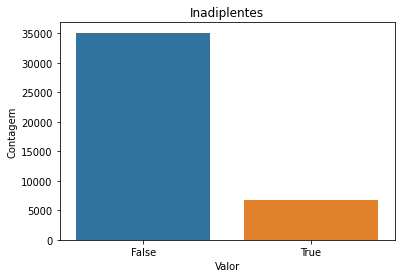

Proporção de inadimplência do Cartão de Crédito no conjunto de dados:
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [61]:
# proporção de inadimplência no conjunto de dados
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title("Inadiplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

print("Proporção de inadimplência do Cartão de Crédito no conjunto de dados:")
print(df['target_default'].value_counts() / df.shape[0])

Podemos ver que nosso conjunto de dados possuí bons pagadores cerca de 78% e com inadimplênciamcerca de 15% 

# Preparação dos Dados

Em nossa análise de dados temos alguns valores infinitos por exemplo a variável reported_income. Esses valores infinitos dão problema para o nosso modelo e por isso devemos corrigi-los. Vamos substituir os valores infinitos por NaN.

In [28]:
#Criando um backup dos dataset
df_clean = df.copy()

# Substituir inf por nan em reported_income
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,
                                                                  np.nan)


A próxima etapa é descartar as colunas desnecessárias.
*  'ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year' e 'channel'.
'IDs' não são relevantes para o modelo, e 'target_fraud' não está relacionado com a tarefa. 
* Quando se trata de 'channel' e  'external_data_provider_credit_checks_last_2_year', eles têm apenas um valor possível. Isso significa que eles não podem fazer a diferença em nosso modelo, então vamos deixá-los cair também.

In [64]:
# # Descartando as variáveis que não iremos usar
df_clean.drop(labels=['ids','target_fraud',
                                  'external_data_provider_credit_checks_last_2_year',
                                  'channel'],axis=1, inplace=True)

Agora vamos lidar com as variáveis que possuem algum valor diferente do esperado. Na variável 'external_data_provider_email_seen_before' temos entradas com o valor -999,0. Vamos substituir essas entradas por NaN.
Esse tipo de valor não caberia no nosso modelo.

In [27]:
# substituir inf por nan em reported_income 
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,
                                                                  np.nan)

# substituir -999 em external_data_provider_email_seen_before por NaN

df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
         'external_data_provider_email_seen_before'] = np.nan

# eliminar as entradas onde target_default é NaN
df_clean.dropna(subset=['target_default'], inplace=True)

In [30]:
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# substituição de valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# Variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

#Variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Com essa substituição de valores, podemos verificar que as variáveis escolhidas não possuem mais os valores nulos iniciais.

In [31]:
# verificando as quantidade de dados nulos
df_clean.isnull().sum()

ids                                                 0
target_default                                      0
score_1                                             0
score_2                                             0
score_3                                             0
score_4                                             0
score_5                                             0
score_6                                             0
risk_rate                                           0
last_amount_borrowed                                0
last_borrowed_in_months                             0
credit_limit                                        0
reason                                              0
income                                              0
facebook_profile                                    0
state                                               0
zip                                                 0
channel                                             0
job_name                    

Vamos criar uma cópia do nosso conjunto de dados para nossa análise.

In [35]:
# Criando uma cópia do df
df_eda = df_clean.copy()

# normalizar as colunas numéricas
num_cols = df_eda.drop('target_default')
                      axis=1).select_dtypes(exclude='object').columns
df_eda[num_cols] = StandardScaler().fit_transform(df_eda[num_cols].values)

IndentationError: ignored

Para analisar e visualizar melhor nosso conjunto de dados, vamos codificar as variáveis categóricas substituindo as categoricas por números

In [32]:
from sklearn.preprocessing import LabelEncoder
encoded_eda = df_eda.copy()

# extrair as colunas categóricas
cat_cols = encoded_df.select_dtypes('object').columns

# codificar cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)



NameError: ignored

Agora vamos ver como nosso conjunto de dados ficou.


In [21]:
encoded_eda.head(3)

,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,ids_encoded,target_default_encoded
0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,9085,0
1,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN,33018,0
2,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,17835,1


Com os dados tratados, agora podemos definir um modelo e separar a variável alvo das demais e dividir o dataset entre dados de treino e teste com a função `train_test_split`. 

In [16]:
X = encoded_eda.drop('target_default', axis=1)
y = encoded_eda['target_default']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


NameError: ignored

Vamos balancear os dados de treino, pois vimos que estão um pouco desbalanceados.

True     6661
False    6661
dtype: int64


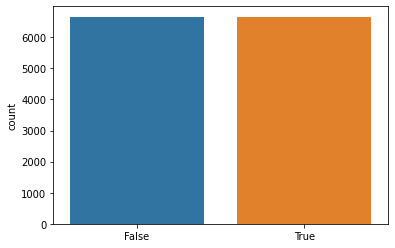

In [97]:
rus = RandomUnderSampler()
X, y = rus.fit_sample(X, y)

# Ver o resultado do balanceamento
print(pd.Series(y).value_counts())

#plotando o balanceamento
sns.countplot(y)

# Construção do modelo

Logo após separarmos nosso conjunto de dados entre teste e treino.
* Criar uma baseline a ser batida. Idealmente, usaríamos os resultados da solução atual empregada pela empresa, ou até uma métrica que não utilize *Machine Learning*. Como não estamos inseridos nesse cotexto, utilizaremos um modelo arbitrário, não parametrizado, como baseline.
* Definir a melhor métrica para avaliar nosso modelo.
* Comparar modelos diferentes levando a métrica alvo e o baseline como comparação.
* Tunar os hiperparâmetros em um conjunto de validação.
* Rodar o modelo em nossos dados de teste.

Arbitrariamente, escolhi o `RandomForestClassifier` para a construção do baseline.

Não foi realizada uma análise mais aprofundada sobre as variáveis e nem um *tunning* de parâmetros, mas construído um modelo simples para servir de *baseline*.


### Métricas e Modelos

Para decidirmos que métrica usar, precisamos analisar algumas de nossas opções.

* Caso optemos pela `Acurácia`, precisamos estar cientes que esse pode não ser o método ideal, mas para uma análise inicial do problema, pode nos ajudar a criar uma solução generalista.

* Caso optemos por otimizar o modelo a partir do `Recall`, estamos priorizando que não haja Falsos Negativos. Ou seja, é preferível negar um cliente que não traria prejuízo à empresa, do que aceitar um que traga. Essa é a forma que são tratados, por exemplo, fraudes em cartão de crédito, modelos médicos, etc.

* Caso optemos por otimizar a partir do `Precision`, essencialmente, estamos dizendo que Falsos Positivos são ok, e não queremos ter Falsos Negativos. Basicamente, é preferível aceitar clientes que possam trazer prejuízo, do que deixar de aceitar clientes que não trarão. Essa é a forma que são tratados, por exemplo, modelos para spam de e-mails.

Aqui, vamos utilizar a `Acurácia`, no intuito de realizar uma análise generalista, deixando o *fine-tuning* de métricas e modelos para o talento dos alunos.

O que vai definir a melhor métrica é a estratégia de negócio da empresa, e seus valores. Também por isso, vamos utilizar essa métrica mais "genérica".


In [4]:
def val_model(X,y,clf, quite= False):
  
  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, scoring = "recall")
  if quite == False:
    print("Recall: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

# Criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)


NameError: ignored

### Modelos

Para tentar bater essa baseline, vamos testar diferentes modelos:

* Random Forest Classifier (Baseline)
* Decision Tree Classifier
* SGD Classifier
* SVC
* Logistic Regression
* XGB Classifier
* LGBM Classifier

In [3]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier

model = []
acc = []

# avaliar desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    acc.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=acc, index=model, columns=['acc'])

NameError: ignored